## Reinforcement Learning

### 1. Homework tasks

- Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

- Fonction d'affichage des grilles :

In [99]:
def draw(grille, position, R, poids) :

    # Affichage de la grille
    fig, ax = plt.subplots()
    ax.matshow(grille, cmap=mcolors.ListedColormap(['white', 'black', 'green', 'red']))
    
    # Affichage des poids pour chaque case
    if poids == True :
        for (i, j), z in np.ndenumerate(R):
            ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', size=20)
            
    # Affichage de la position du robot
    else :
        ax.text(position[1], position[0], '$\oplus$', ha='center', va='center', size=50, c='gray')
    
    # Grille et index    
    ax.set_yticks(np.arange(3))
    ax.set_yticks(np.arange(3)-0.5, minor=True)
    ax.set_yticklabels(range(3,0,-1))

    ax.set_xticks(np.arange(0,4))
    ax.set_xticks(np.arange(4)-0.5, minor=True)
    ax.set_xticklabels(range(1,5))
    ax.tick_params(axis="x", labelbottom=True, labeltop=False)

    ax.grid(True, which="minor")
    plt.show()
    
    return

- Fonction d'initialisation :

In [372]:
def init() :
    
    # Point de départ
    position=[2,0]
    
    # Création de la grille
    grille = np.zeros((3, 4))
    grille[1][1] = 1
    grille[0][3] = 2
    grille[1][3] = 3
    
    # Création de la liste d'action sel
    Actions = {
        (0,0) : ["Est","Sud"],
        (0,1) : ["Ouest","Est"],
        (0,2) : ["Ouest","Est","Sud"],
        (1,0) : ["Nord","Sud"],
        (1,2) : ["Nord","Est","Sud"],
        (2,0) : ["Nord","Est"],
        (2,1) : ["Ouest","Est"],
        (2,2) : ["Ouest","Nord","Est"],
        (2,3) : ["Ouest","Nord"]
    }
    
    # Création de la grille de récompense
    R = np.zeros((3, 4)) - 0.02
    R[1][1] = 0
    R[0][3] = 1
    R[1][3] = -1
    
    # Initialisation de V*
    V = R
    
    # Facteur de remise
    γ = 0.99
    
    return grille, position, R, γ, Actions, V

- Aperçu des données initialisées :

- Grille de jeu + Position de départ :


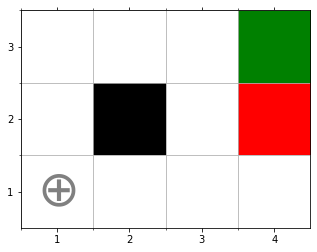

- Grille de récompense :


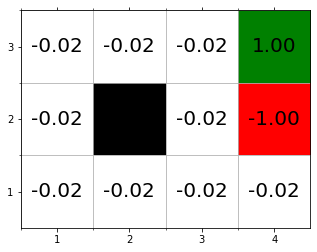


- Facteur de remise γ = 0.99

- Liste des actions par case :
 {(0, 0): ['Est', 'Sud'], (0, 1): ['Ouest', 'Est'], (0, 2): ['Ouest', 'Est', 'Sud'], (1, 0): ['Nord', 'Sud'], (1, 2): ['Nord', 'Est', 'Sud'], (2, 0): ['Nord', 'Est'], (2, 1): ['Ouest', 'Est'], (2, 2): ['Ouest', 'Nord', 'Est'], (2, 3): ['Ouest', 'Nord']}


In [373]:
grille, position, R, γ, Actions, V = init()

print("- Grille de jeu + Position de départ :")
draw(grille, position, R, False)

print("- Grille de récompense :")
draw(grille, position, R, True)

print("\n- Facteur de remise γ =", γ)

print("\n- Liste des actions par case :\n", Actions)

- Fonction d'affichage de la légende :

In [278]:
def legende():
    
    print("Case blanche : case vide")
    print("Case noire : case interdite/obstacle")
    print("Signe grise : position courrante du robot")
    print("Case verte : case finale +1 à atteindre")
    print("Case rouge : case finale -1 à éviter\n")
    
    return

### 1) Valeur optimale et politique optimale

- Calcul des valeur optimale et politique optimale :

In [377]:
grille, position, R, γ, Actions, V = init()

# Initialisation de ∏
Pi = {}
for s in Actions:
    Pi[s] = np.random.choice(Actions[s])
    
while True:
    biggest_change = 0
    for s in Actions:
        if s in Pi :

            old_v = V[s]
            new_v = 0

            for a in Actions[s]:

                if a == 'Nord':
                    nxt = [s[0]-1, s[1]]
                if a == 'Sud':
                    nxt = [s[0]+1, s[1]]
                if a == 'Ouest':
                    nxt = [s[0], s[1]-1]
                if a == 'Est':
                    nxt = [s[0], s[1]+1]

                #Choose a new random action to do (transition probability)
                rand = np.random.choice([i for i in Actions[s] if i != a])
                if rand == 'Nord':
                    act = [s[0]-1, s[1]]
                if rand == 'Sud':
                    act = [s[0]+1, s[1]]
                if rand == 'Ouest':
                    act = [s[0], s[1]-1]
                if rand == 'Est':
                    act = [s[0], s[1]+1]

                #Calculate the value
                nxt = tuple(nxt)
                act = tuple(act)
                v = R[s[0]][s[1]] + (γ * (0.9*V[nxt] + 0.9*V[nxt])) 
                if v > new_v: #Is this the best action so far? If so, keep it
                    new_v = v
                    Pi[s] = a

            #Save the best of all actions for the state                                 
            V[s] = new_v
                        
    biggest_change = max(biggest_change, np.abs(old_v - V[s]))
   #See if the loop should stop now         
    if biggest_change < 0.005:
        break

<ipython-input-377-3d93afe09a7d>:41: RuntimeWarning: overflow encountered in double_scalars
  v = R[s[0]][s[1]] + (γ * (0.9*V[nxt] + 0.9*V[nxt]))
<ipython-input-377-3d93afe09a7d>:49: RuntimeWarning: invalid value encountered in double_scalars
  biggest_change = max(biggest_change, np.abs(old_v - V[s]))


In [379]:
print(Pi)

{(0, 0): 'Est', (0, 1): 'Ouest', (0, 2): 'Ouest', (1, 0): 'Nord', (1, 2): 'Nord', (2, 0): 'Nord', (2, 1): 'Ouest', (2, 2): 'Ouest', (2, 3): 'Ouest'}


In [370]:
SMALL_ENOUGH = 0.005
GAMMA = 0.9         
NOISE = 0.1 

#Define all states
all_states=[]
for i in range(3):
    for j in range(4):
            all_states.append((i,j))

#Define rewards for all states
rewards = {}
for i in all_states:
    if i == (1,2):
        rewards[i] = -1
    elif i == (2,2):
        rewards[i] = -1
    elif i == (2,3):
        rewards[i] = 1
    else:
        rewards[i] = 0

#Dictionnary of possible actions. We have two "end" states (1,2 and 2,2)
actions = {
    (0,0):('D', 'R'), 
    (0,1):('D', 'R', 'L'),    
    (0,2):('D', 'L', 'R'),
    (0,3):('D', 'L'),
    (1,0):('D', 'U', 'R'),
    (1,1):('D', 'R', 'L', 'U'),
    (1,3):('D', 'L', 'U'),
    (2,0):('U', 'R'),
    (2,1):('U', 'L', 'R'),
    }

#Define an initial policy
policy={}
for s in actions.keys():
    policy[s] = np.random.choice(actions[s])

#Define initial value function 
V={}
for s in all_states:
    if s in actions.keys():
        V[s] = 0
    if s ==(2,2):
        V[s]=-1
    if s == (1,2):
        V[s]=-1
    if s == (2,3):
        V[s]=1

print(V)
print(rewards)
'''==================================================
Value Iteration
=================================================='''

iteration = 0
while True:
    biggest_change = 0
    for s in all_states:            
        if s in policy:
            
            old_v = V[s]
            new_v = 0
            
            for a in actions[s]:
                if a == 'U':
                    nxt = [s[0]-1, s[1]]
                if a == 'D':
                    nxt = [s[0]+1, s[1]]
                if a == 'L':
                    nxt = [s[0], s[1]-1]
                if a == 'R':
                    nxt = [s[0], s[1]+1]

                #Choose a new random action to do (transition probability)
                random_1=np.random.choice([i for i in actions[s] if i != a])
                if random_1 == 'U':
                    act = [s[0]-1, s[1]]
                if random_1 == 'D':
                    act = [s[0]+1, s[1]]
                if random_1 == 'L':
                    act = [s[0], s[1]-1]
                if random_1 == 'R':
                    act = [s[0], s[1]+1]

                #Calculate the value
                nxt = tuple(nxt)
                act = tuple(act)
                v = rewards[s] + (GAMMA * ((1-NOISE)* V[nxt] + (NOISE * V[act]))) 
                if v > new_v: #Is this the best action so far? If so, keep it
                    new_v = v
                    policy[s] = a

       #Save the best of all actions for the state                                 
            V[s] = new_v
            biggest_change = max(biggest_change, np.abs(old_v - V[s]))
   #See if the loop should stop now         
    if biggest_change < SMALL_ENOUGH:
        break
    iteration += 1

{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): 0, (1, 1): 0, (1, 2): -1, (1, 3): 0, (2, 0): 0, (2, 1): 0, (2, 2): -1, (2, 3): 1}
{(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): 0, (1, 1): 0, (1, 2): -1, (1, 3): 0, (2, 0): 0, (2, 1): 0, (2, 2): -1, (2, 3): 1}
